In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from utils import holdout
from utils import sigmoid
from utils import confusion_mat
from logistic_regression import LogisticReg

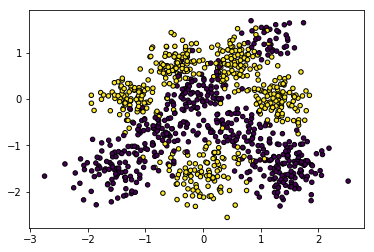

In [2]:
dict_data = scipy.io.loadmat("classification.mat")
y = dict_data['y'] # Labels 0/1
X = dict_data['X'] # 2-dim dataset

plt.scatter(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1), marker='o', c=y,
            s=20, edgecolor='k')
plt.show()

In [3]:
def roc_curve(X, y, beta):
    x_axis, y_axis = [], []
    for tau in np.linspace(0,1,100):
        test = LogisticReg(X,y)
        y_pred = test.predictions(beta, tau=tau)
        conf = confusion_mat(y, y_pred)
        x_axis.append(conf[0,1])
        y_axis.append(conf[1,1])
    plt.plot(x_axis, y_axis, label='MLE of $beta')
    plt.plot(x_axis, x_axis, label='Chance')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.ylabel("True positives")
    plt.xlabel("False Positives")
    plt.legend()
    area = np.trapz(-np.array(y_axis).T, np.array(x_axis).T)
    return area

trainRatio = 0.6 # ensures sufficient accuracy on the test set
X_train, X_test, y_train, y_test = holdout(X, y , trainRatio)

Convergence not reached after 500 iterations
Convergence not reached after 500 iterations


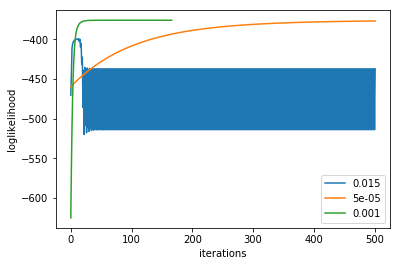

In [4]:
train = LogisticReg(X_train, y_train)

train.gradient_descent(lr=0.015,
                         tol=0.1)
train.gradient_descent(lr=0.00005,
                         tol=0.001)
train.gradient_descent(lr=0.001,
                         tol=0.0001)
plt.show()

loglikelihood of training set per data point: -0.626366
loglikelihood of test set per data point: -0.619908
Confusion matrix: [[[ 0.73631841]
  [ 0.26368159]]

 [[ 0.33165829]
  [ 0.66834171]]]
Area under roc curve: 0.718018


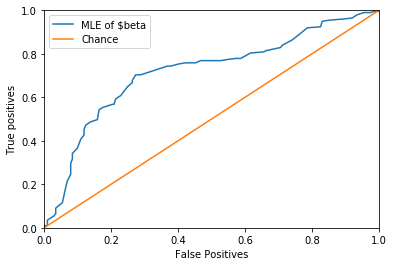

In [5]:
test = LogisticReg(X_test, y_test)
print "loglikelihood of training set per data point: %f" %(
    train.loglik(train.beta)/train.N)
print "loglikelihood of test set per data point: %f" %(
    test.loglik(train.beta)/test.N)
# Make predictions with default threshold
y_pred = test.predictions(train.beta, tau=0.5)
print "Confusion matrix:", confusion_mat(y_test, y_pred)
area = roc_curve(X_test, y_test, train.beta)
print "Area under roc curve: %f" %(area)
plt.show()

# Using RBFs feature extension, varying lengthscales

logistic_regression.py:43: RuntimeWarning: divide by zero encountered in log
  + (1.0 - self.y)*np.log(1.0 - sigmas))
logistic_regression.py:43: RuntimeWarning: invalid value encountered in multiply
  + (1.0 - self.y)*np.log(1.0 - sigmas))


Convergence not reached after 500 iterations


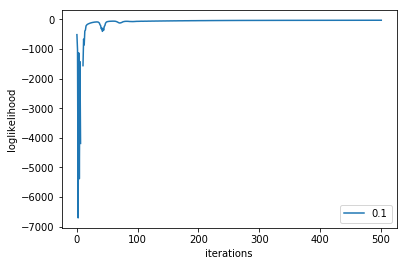

array([-28.39060891])

In [6]:
train = LogisticReg(X_train, y_train)
X_rbf = train.RBF_features(X_train, ls=0.1)
train_rbf = LogisticReg(X_rbf, y_train)
train_rbf.gradient_descent(lr=0.1,
                         tol=0.0001)
plt.show()
train_rbf.loglik(train_rbf.beta)

loglikelihood of training set per data point: -0.047318
loglikelihood of test set per data point: -0.438524
Confusion matrix: [[[ 0.87562189]
  [ 0.12437811]]

 [[ 0.10050251]
  [ 0.89949749]]]
Area under roc curve: 0.939823


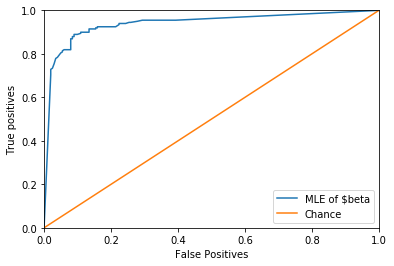

In [7]:
test = LogisticReg(X_test, y_test)
X_test_rbf = test.RBF_features(X_train, ls=0.1)
test_rbf = LogisticReg(X_test_rbf, y_test)
print "loglikelihood of training set per data point: %f" %(
    train_rbf.loglik(train_rbf.beta)/train.N)
print "loglikelihood of test set per data point: %f" %(
    test_rbf.loglik(train_rbf.beta)/test.N)
y_pred = test_rbf.predictions(train_rbf.beta, tau=0.5)
print "Confusion matrix:", confusion_mat(y_test, y_pred)
area = roc_curve(X_test_rbf, y_test, train_rbf.beta)
print "Area under roc curve: %f" %(area)
plt.show()


# MAP estimate of beta

Convergence not reached after 500 iterations


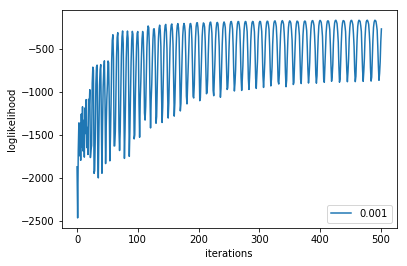

array([-194.18607555])

In [16]:
train = LogisticReg(X_train, y_train)
X_rbf = train.RBF_features(X_train, ls=1)
train_rbf = LogisticReg(X_rbf, y_train)
train_rbf.grad_descent_MAP(lr=0.001,
                           tol=0.01)
plt.show()
train_rbf.loglik(train_rbf.beta)

loglikelihood of training set per data point: -0.323643
loglikelihood of test set per data point: -0.350704
Confusion matrix: [[[ 0.89054726]
  [ 0.10945274]]

 [[ 0.13065327]
  [ 0.86934673]]]
Area under roc curve: 0.952336


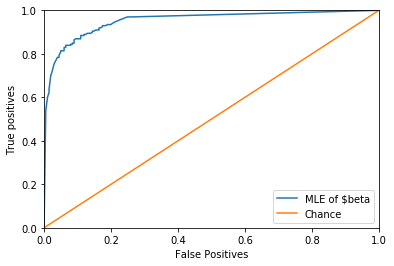

In [18]:
test = LogisticReg(X_test, y_test)
X_test_rbf = test.RBF_features(X_train, ls=1)
test_rbf = LogisticReg(X_test_rbf, y_test)
print "loglikelihood of training set per data point: %f" %(
    train_rbf.loglik(train_rbf.beta)/train.N)
print "loglikelihood of test set per data point: %f" %(
    test_rbf.loglik(train_rbf.beta)/test.N)
y_pred = test_rbf.predictions(train_rbf.beta, tau=0.5)
print "Confusion matrix:", confusion_mat(y_test, y_pred)
area = roc_curve(X_test_rbf, y_test, train_rbf.beta)
print "Area under roc curve: %f" %(area)
plt.show()